<a href="https://colab.research.google.com/github/shezta/Case-Study-02-Data-Mining-UIN-Ganjil-2022-Kelompok-8/blob/main/Studi%20Kasus%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [495]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [496]:
!wget P https://raw.githubusercontent.com/shezta/Case-Study-02-Data-Mining-UIN-Ganjil-2022-Kelompok-8/main/Case-Study-02-MixITup.csv

--2022-10-12 04:51:11--  http://p/
Resolving p (p)... failed: Name or service not known.
wget: unable to resolve host address ‘p’
--2022-10-12 04:51:11--  https://raw.githubusercontent.com/shezta/Case-Study-02-Data-Mining-UIN-Ganjil-2022-Kelompok-8/main/Case-Study-02-MixITup.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9248 (9.0K) [text/plain]
Saving to: ‘Case-Study-02-MixITup.csv.29’

Case-Study-02-MixIT 100%[===================>]   9.03K  --.-KB/s    in 0s      

2022-10-12 04:51:11 (79.7 MB/s) - ‘Case-Study-02-MixITup.csv.29’ saved [9248/9248]

FINISHED --2022-10-12 04:51:11--
Total wall clock time: 0.1s
Downloaded: 1 files, 9.0K in 0s (79.7 MB/s)


In [497]:
data = pd.read_csv("Case-Study-02-MixITup.csv", low_memory = False, encoding = "utf8")

In [498]:
data.head()

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8


#**Melihat Type Data**

In [499]:
print(type(data))
N,P = data.shape
print("Baris =",N, "Kolom =",P)

<class 'pandas.core.frame.DataFrame'>
Baris = 200 Kolom = 10


In [500]:
data.columns

Index(['ID', 'Jenis Kelamin', 'Umur', 'Pendapatan-per-bulan',
       'skor-pengeluaran', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor'],
      dtype='object')

#**Mengoreksi Type Data**

In [501]:
data.dtypes

ID                        int64
Jenis Kelamin            object
Umur                      int64
Pendapatan-per-bulan      int64
skor-pengeluaran          int64
Menikah                  object
Kota                     object
Promo                   float64
HariFav                  object
FavFlavor                 int64
dtype: object

In [502]:
data["Jenis Kelamin"] = data["Jenis Kelamin"].astype("category")
data["Kota"] = data["Kota"].astype("category")
data["HariFav"] = data["HariFav"].astype("category")
data["ID"] = data["ID"].astype("category")

In [503]:
data.dtypes

ID                      category
Jenis Kelamin           category
Umur                       int64
Pendapatan-per-bulan       int64
skor-pengeluaran           int64
Menikah                   object
Kota                    category
Promo                    float64
HariFav                 category
FavFlavor                  int64
dtype: object

#**Mengatasi Missing Value**

In [504]:
data.duplicated().sum()

0

In [505]:
data.isna().sum()

ID                       0
Jenis Kelamin            5
Umur                     0
Pendapatan-per-bulan     0
skor-pengeluaran         0
Menikah                 13
Kota                     0
Promo                    6
HariFav                  0
FavFlavor                0
dtype: int64

In [506]:
#Menghapus kolom Promo yang bernilai diluar index(noise)
data.loc[data.Promo == 5]
data = data.drop(14)

In [507]:
#Menghapus kolom FavFlavor yang bernilai diluar index(noise)
data.loc[data.FavFlavor == 9]
data = data.drop(130)
#Mengubah Type data FavFlavor menjadi Kategori
data["FavFlavor"] = data["FavFlavor"].astype("category")

In [508]:
#Menghapus Variabel Menikah
data.drop("Menikah", axis = 1, inplace = True)
#Mengisi kolom Promo kosong dengan Modus
modus = data['Promo'].mode()[0]
data['Promo'] = data['Promo'].fillna(modus)

In [509]:
data.dropna(axis = 0, inplace = True)
data.isna().sum()

ID                      0
Jenis Kelamin           0
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Kota                    0
Promo                   0
HariFav                 0
FavFlavor               0
dtype: int64

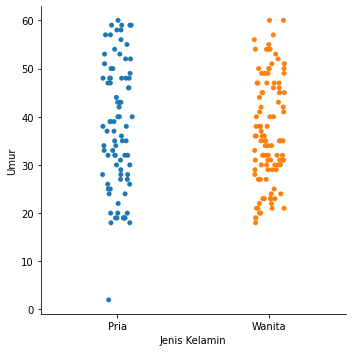

In [510]:
p = sns.catplot(x="Jenis Kelamin", y="Umur", data=data)

Terdapat satu data yang terlihat memiliki karakteristik yang berbeda dengan data lainnya diduga kesalahan input(human error) maka data tersebut perlu dihapus dari dataset

In [511]:
#Mencari data yang terlihat memiliki karakteristik yang berbeda
data.loc[data.Umur == 2]
#Menghapus data kolom 119
data = data.drop(119)

#**VISUALISASI**

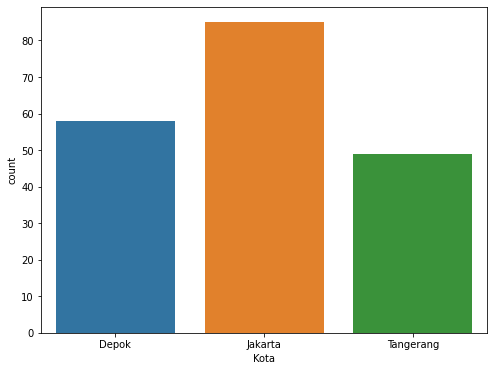

In [512]:
plt.figure(figsize=(8,6)) 
p = sns.countplot(x="Kota", data=data)

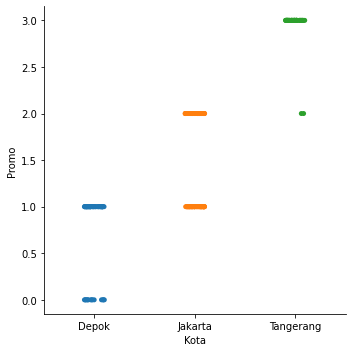

In [513]:
p = sns.catplot(x="Kota", y="Promo", data= data)

customer di Kota Depok cenderung lebih jarang bahkan tidak pernah menggunakan promo diskon, hal ini mungkin akan meningkatkan penghasilan perusahaan. Sementara customer di Kota Tanggerang cederung lebih sering menggunakan promo diskon, sehingga hal ini dapat mempengaruhi penghasilan dari perusahaan MixITup

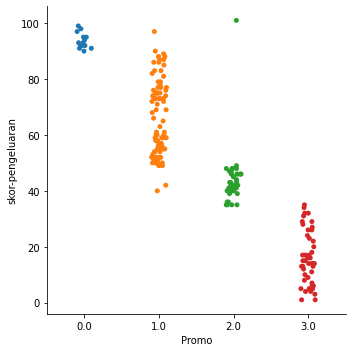

In [521]:
p = sns.catplot(y="skor-pengeluaran", x="Promo", data= data)

Ketika customer tidak menggunakan promo diskon, mereka akan lebih cenderung mengalami pengeluaran yang tinggi. Hal ini, cenderung dapat memberikan keuntungan bagi perusahaan MixITup.

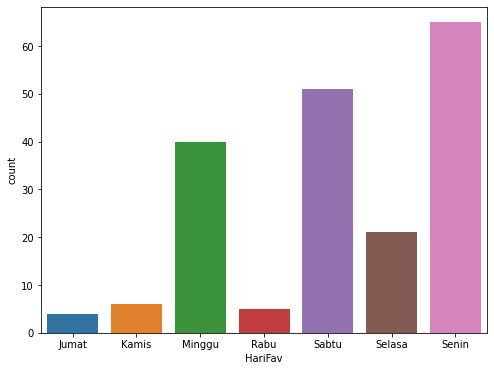

In [514]:
#Tambah dimensi data
plt.figure(figsize=(8,6)) 
p = sns.countplot(x="HariFav", data=data)

Berdasarkan diagram diatas terlihat bahwa pelanggan pada hari senin cenderung lebih banyak daripada hari lainnya, sedangkan pelanggan pada hari rabu, kamis, dan jumat cenderung sedikit. Untuk itu dapat dilakukan hal-hal yang akan menarik pelanggan seperti memberikan fasilitas yang lengkap, tempat yang instagramable, dan nyaman

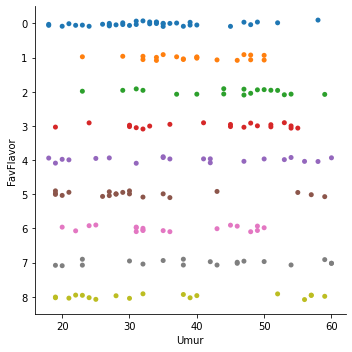

In [515]:
p = sns.catplot(x="Umur", y="FavFlavor", data= data)

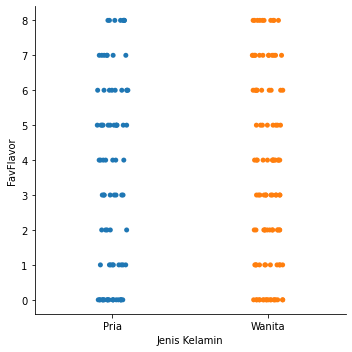

In [516]:
p = sns.catplot(x="Jenis Kelamin", y="FavFlavor", data= data)

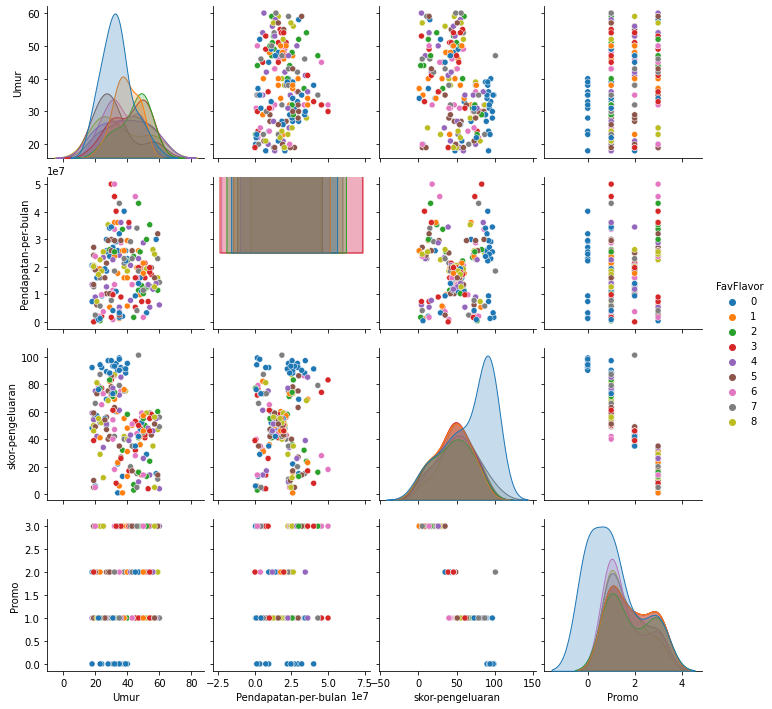

In [517]:
g = sns.pairplot(data, hue="FavFlavor")

In [523]:
h= sns.catplot(x="Pendapatan-per-bulan", y="Promo", hue="sex", kind="swarm")

ValueError: ignored

#Clustering

In [518]:
from sklearn.preprocessing import OneHotEncoder
y = OneHotEncoder(sparse=False)
y = y.fit_transform(data[['FavFlavor']])
data_y = pd.DataFrame(y)
data_y

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
187,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
190,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [519]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]#.values
C = df['species']#.values
print(X.shape)
df.sample(7)

NameError: ignored